In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

In [2]:
def weighted_mean(segment, alpha):
    # weights = 1 / (np.arange(len(segment)) + 1)**alpha
    weights = np.exp(- alpha * np.arange(len(segment)))
    weights = weights / np.sum(weights)
    return np.sum(weights * segment)

In [3]:
def difference_scores(X, alpha=0.5):
    N = len(X)
    scores = np.zeros(N - 1)
    for c in range(1, N):
        diff = abs(weighted_mean(X[:c][::-1], alpha) - weighted_mean(X[c:], alpha))
        scores[c-1] = diff
    return (scores - scores.min()) / (scores.max() - scores.min())

In [4]:
def select_changepoints_top_k(scores, k):
    return np.argsort(scores)[::-1][:k]

In [5]:
def select_changepoints_by_quartile(scores, quartile=25):
    return np.where(scores > np.percentile(scores, quartile))[0]

In [6]:
def plot_with_changepoints(X, changepoints, title=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 1.5))
    
    ax.scatter(np.arange(len(X)), X, marker='o', color='black')
    for c in changepoints:
        ax.axvline(x=c + 0.5, color='black', linestyle='--')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    if title:
        ax.set_title(title)

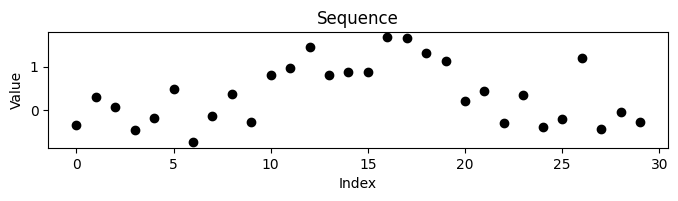

In [7]:
# Example data
means = [0, 1, 0]
stds = [0.3, 0.3, 0.3]
sizes = [10, 10, 10]

segments = [np.random.normal(loc=mean, scale=std, size=size)for mean, std, size in zip(means, stds, sizes)]
X = np.concatenate(segments)
X[26] = 1.2

plt.figure(figsize=(8, 1.5))
plt.scatter(np.arange(len(X)), X, marker='o', color='black')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title("Sequence")
plt.show()

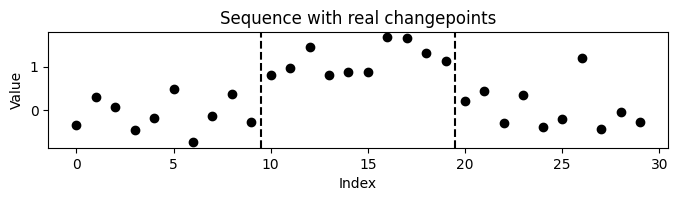

In [8]:
plot_with_changepoints(X, np.cumsum(sizes)[:-1] - 1, title=f"Sequence with real changepoints")

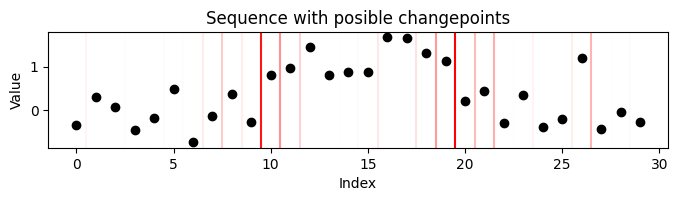

In [9]:
# Calculate difference scores
scores = difference_scores(X)

plt.figure(figsize=(8, 1.5))
for idx, alpha in enumerate(scores**3):
    plt.axvline(x=idx + 0.5, color='red', alpha=alpha)
plt.scatter(np.arange(len(X)), X, marker='o', color='black')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title("Sequence with posible changepoints")
plt.show()

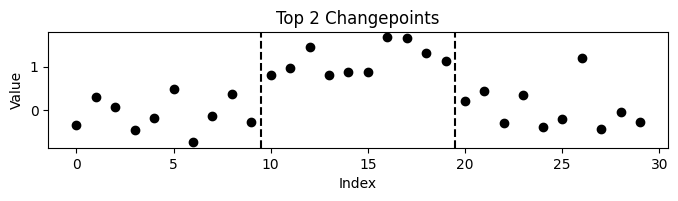

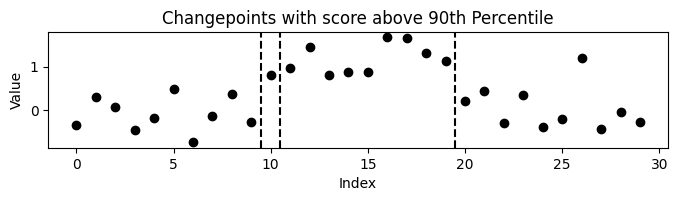

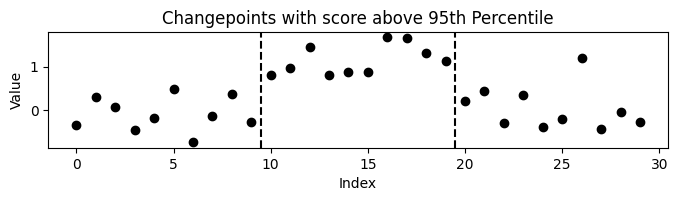

In [10]:
# Option 1: choose top k changepoints
top_k = 2
changepoints_topk = select_changepoints_top_k(scores, top_k)
plot_with_changepoints(X, changepoints_topk, title=f"Top {top_k} Changepoints")

# Option 2: choose changepoints by quartile threshold
quartile = 90
changepoints_quartile = select_changepoints_by_quartile(scores, quartile)
plot_with_changepoints(X, changepoints_quartile, title=f"Changepoints with score above {quartile}th Percentile")

quartile = 95
changepoints_quartile = select_changepoints_by_quartile(scores, quartile)
plot_with_changepoints(X, changepoints_quartile, title=f"Changepoints with score above {quartile}th Percentile")